# <center> Network Descriptive Statistics_I </center>

References:<br>
https://igraph.org/python/doc/tutorial/tutorial.html<br>
https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial<br>
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.structuralholes.constraint.html

In [1]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 1. Networks from social networking sites

### 1.1. Create a graph

In [2]:
# Let's use the dataset we scrapted from the crowdsourcing website

# we create a graph using the edglist 
edgelist=pd.read_csv('follow_el.csv', header=None)
edgelist=edgelist.to_numpy().tolist() 
edgelist

[['Artefact3', 'Adamraydaniels'],
 ['Artefact3', 'BedlamBones'],
 ['Caterpill', 'BedlamBones'],
 ['Artefact3', 'footsawtees'],
 ['Caterpill', 'footsawtees'],
 ['artecco', 'footsawtees'],
 ['footsawtees', 'Jemae'],
 ['footsawtees', 'nicepunk'],
 ['footsawtees', 'Alundrart'],
 ['footsawtees', 'ANGRYMERL'],
 ['footsawtees', 'JonzShop'],
 ['footsawtees', 'Artefact3'],
 ['footsawtees', 'neni_art__'],
 ['gamerzink357', 'gulayfather'],
 ['Artefact3', 'gulayfather'],
 ['Caterpill', 'gulayfather'],
 ['Artefact3', 'venozoic'],
 ['Caterpill', 'venozoic'],
 ['HOLOM', 'VirtualSG'],
 ['Artefact3', 'VirtualSG'],
 ['Caterpill', 'VirtualSG'],
 ['mani1991', 'beramsey'],
 ['markyartshop', 'beramsey'],
 ['mckirbzx', 'beramsey'],
 ['Hunniebee00', 'beramsey'],
 ['Artefact3', 'beramsey'],
 ['Caterpill', 'beramsey'],
 ['beramsey', 'mckirbzx'],
 ['beramsey', 'gamerzink357'],
 ['beramsey', 'JonzShop'],
 ['beramsey', 'Artefact3'],
 ['beramsey', 'mani1991'],
 ['beramsey', 'markyartshop'],
 ['beramsey', 'TheSimple

In [3]:
# Create empty DIRECTED graph
G = nx.DiGraph()

# Add edges 
G.add_edges_from(edgelist)

print('# of edges: {}'.format(G.number_of_edges()))
print('# of nodes: {}'.format(G.number_of_nodes()))

list(G.nodes)[0:5]


# of edges: 720
# of nodes: 168


['Artefact3', 'Adamraydaniels', 'BedlamBones', 'Caterpill', 'footsawtees']

In [4]:
# Let's add some nodal attributes to the graph

# Here we use the individual level data we scrapted
nodelist= pd.read_csv('artists2.csv', header=0)

# create a new varaible tenure
nodelist["tenure"]=2021-nodelist["since"]

# subset the variables we want
nodelist=nodelist.iloc[:,[5,6,1]]

# bin tenure and number of designs submitted
nodelist["tenure_cat"]=pd.qcut(nodelist["tenure"], q=[0, 0.6, 1], 
                             labels=["blue","red"])
nodelist["submitted_cat"]=pd.qcut(nodelist["submitted"], q=[0, 0.6, 1],
                              labels=["blue","red"])

# make author name as index
nodelist=nodelist.set_index(nodelist.author)
nodelist.head()
nodelist.loc["EggCoop"]


,author,tenure,submitted,tenure_cat,submitted_cat
author,,,,,
maryaa,maryaa,0,41,blue,red
EggCoop,EggCoop,0,4,blue,blue
gulayfather,gulayfather,1,16,blue,red
Kentooth,Kentooth,1,8,blue,blue
DailyCollection,DailyCollection,0,4,blue,blue


author           EggCoop
tenure                 0
submitted              4
tenure_cat          blue
submitted_cat       blue
Name: EggCoop, dtype: object

In [6]:
# Add node attributes
for i in G.nodes:
    G.add_nodes_from([i], tenure=nodelist.loc[i][3])
    G.add_nodes_from([i], submitted=nodelist.loc[i][4])
G.nodes["Artefact3"]


{'tenure': 'blue', 'submitted': 'red'}

In [7]:
# Let's get to know more about the graph we created
# is it directed?
nx.is_directed(G)

# network density
nx.density(G)

# neighbors of each node
neighbors=[]
for i in nx.neighbors(G, "DailyCollection"):
    neighbors.append(i)
neighbors

# get adjacency matrix
nx.incidence_matrix(G).todense()

True

0.02566295979469632

['TheSimpleStore',
 'kooky love',
 'Jemae',
 'anwarrafiee',
 'Die_at13',
 'febrianddwi',
 'CrazyCollective']

matrix([[1., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

### 1.2. Network visualization

Text(0.5, 1.0, 'The follower-followee network of desingers')

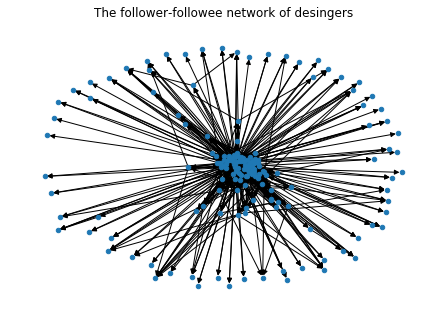

In [8]:
# https://networkx.org/documentation/stable/reference/drawing.html

nx.draw(G, node_size=20)
plt.title('The follower-followee network of desingers')
plt.show()

#### Some convetional rules for network visualization
- Node size proportional to degree
- Node color corresponds to node categories
- Edge size proportional to edge weight
- Looks good!

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of desingers')

(-1.1593008036875767,
 0.6764513149978295,
 -0.7928800730510145,
 0.9562072552334274)

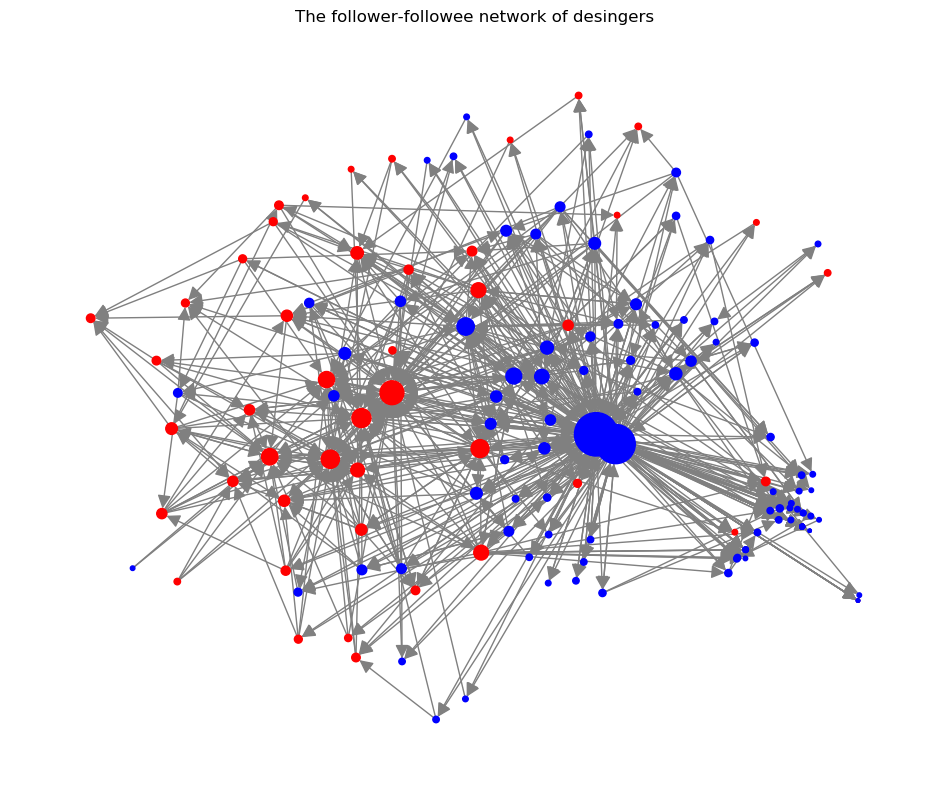

In [9]:
# we can also specify node and edge features 
# to make the graph easier to interpret
figure(figsize=(12, 10), dpi=100)

# node size proportional to degree
node_size= [x * 900 for x in nx.degree_centrality(G).values()]

# choose a layout function
pos=nx.kamada_kawai_layout(G)

# edge color
edge_color="grey"

# make arrows more obvious
arrowsize=20

# make a list of colors corresponding to tenure
node_color= [nodelist.loc[i][3] for i in G.nodes] # tenure
#node_color= [nodelist.loc[i][4] for i in G.nodes] # submitted


nx.drawing.nx_pylab.draw_networkx(G,node_size=node_size, 
                                  pos=pos,
                                  node_color=node_color,
                                  arrowsize=arrowsize,
                                  edge_color=edge_color,
                                  with_labels=False)
plt.title('The follower-followee network of desingers')
plt.axis("off") 
plt.show()


### 1.3. Network descriptive statistics

#### 1.3.1. Centrality - Node level
* Degree centrality
* Closeness centrality
* Betweeness centrality
* Eigenvector centrality

In [19]:
# degree centrality
sorted([x for x in nx.degree_centrality(G).items()],key=lambda x: -x[1])

# indegree centrality, follower factory?
[x for x in nx.in_degree_centrality(G).items()][0]
# outdegree centrality
[x for x in nx.out_degree_centrality(G).items()][0]

[('Artefact3', 1.0838323353293413),
 ('Caterpill', 0.8862275449101797),
 ('kooky love', 0.3293413173652695),
 ('ppmid', 0.2095808383233533),
 ('tobefonseca', 0.19161676646706588),
 ('karakenio', 0.18562874251497008),
 ('Die_at13', 0.17365269461077845),
 ('dnice25', 0.15568862275449102),
 ('Jemae', 0.14970059880239522),
 ('Crowing_Dawn', 0.14371257485029942),
 ('artecco', 0.125748502994012),
 ('TheFactorie', 0.125748502994012),
 ('Audygo', 0.11976047904191617),
 ('bewarethevipers', 0.10778443113772455),
 ('Hunniebee00', 0.09580838323353294),
 ('Moutchy', 0.08982035928143713),
 ('beramsey', 0.08383233532934133),
 ('neni_art__', 0.07784431137724551),
 ('Liodoesthings', 0.07784431137724551),
 ('VintageStudio', 0.07784431137724551),
 ('justduick', 0.07784431137724551),
 ('markyartshop', 0.07185628742514971),
 ('andrealeonelli', 0.07185628742514971),
 ('anwarrafiee', 0.07185628742514971),
 ('ninhol', 0.07185628742514971),
 ('OlgaOsynskaya', 0.07185628742514971),
 ('JonzShop', 0.0658682634730

('Artefact3', 0.19760479041916168)

('Artefact3', 0.8862275449101797)

In [11]:
# closeness centrality
[x for x in nx.closeness_centrality(G).items()][0]

('Artefact3', 0.2645132270669928)

In [12]:
# betweeness centrality
[x for x in nx.betweenness_centrality(G).items()][0]

('Artefact3', 0.39326451188904515)

In [13]:
# eigenvector centrality
[x for x in nx.eigenvector_centrality(G).items()][0]

('Artefact3', 0.2238492975737454)

#### 1.3.2. Structural holes - Node level


In [21]:
# structural hole
# constraint measures the lack of structural holes
[x for x in nx.constraint(G).items()][0]

# effective size measures the structural hole
[x for x in nx.effective_size(G).items()][0]


('Artefact3', 0.07520059942726329)

('Artefact3', 143.97790055248606)

In [40]:
# combine node level measures together
df1=pd.DataFrame.from_dict(nx.betweenness_centrality(G),orient='index')
df2=pd.DataFrame.from_dict(nx.constraint(G),orient='index')


In [41]:
df=pd.concat([df1,df2],axis=1)
df.columns=["betweenness", "constraint"]
df.head()

net=df.merge(nodelist, how='outer', left_index=True, right_index=True)
net.head()

,betweenness,constraint
Artefact3,0.393265,0.075201
Adamraydaniels,0.000000,NaN
BedlamBones,0.000000,NaN
Caterpill,0.081097,0.098541
footsawtees,0.000746,0.204456


,betweenness,constraint,author,tenure,submitted,tenure_cat,submitted_cat
789Design,0.00568,0.27326,789Design,0,22,blue,red
ANGRYMERL,0.00000,NaN,ANGRYMERL,0,1,blue,blue
Abraz,0.00000,NaN,Abraz,0,21,blue,red
Adamraydaniels,0.00000,NaN,Adamraydaniels,0,1,blue,blue
AdilAdi,0.00000,NaN,AdilAdi,0,4,blue,blue


### 1.4. Model building

In [43]:
# We can build a mixed effects model
# designs are clustered in authors
# Hypothesis: author level network features will affect design performance

design= pd.read_csv('design_vars.csv', header=0)
len(design)
len(net)

comp=pd.merge(design,net,on="author",how="left")
len(comp)


comp_remove=comp.dropna(axis=0, how='any') 
len(comp_remove)
comp_remove.head()

300

168

300

199

,url,title,author,score,total_score,betweenness,constraint,tenure,submitted,tenure_cat,submitted_cat
0,/designs/born-to-fight-3,Born to fight,Gresex,1.75,8,0.000013,0.50616,0,20,blue,red
1,/designs/1our-anniversary,1our anniversary,Gresex,1.00,9,0.000013,0.50616,0,20,blue,red
3,/designs/lady-in-pink-4,lady in pink,Haltobreni,1.75,8,0.000000,0.50000,0,10,blue,blue
5,/designs/looking-into-the-void,looking into the void,Haltobreni,1.25,8,0.000000,0.50000,0,10,blue,blue
6,/designs/interested,interested,Haltobreni,1.25,8,0.000000,0.50000,0,10,blue,blue


In [44]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

md = smf.mixedlm("score ~ constraint+submitted", comp_remove, 
                 groups=comp_remove["author"])
mdf = md.fit()
print(mdf.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score    
No. Observations: 199     Method:             REML     
No. Groups:       102     Scale:              0.1531   
Min. group size:  1       Log-Likelihood:     -157.1884
Max. group size:  10      Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.495    0.140 17.763 0.000  2.219  2.770
constraint   -1.193    0.428 -2.790 0.005 -2.030 -0.355
submitted     0.001    0.001  1.220 0.222 -0.000  0.002
Group Var     0.177    0.144                           



In [45]:
md = smf.mixedlm("score ~ betweenness+submitted", comp_remove, 
                 groups=comp_remove["author"])
mdf = md.fit()
print(mdf.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score    
No. Observations: 199     Method:             REML     
No. Groups:       102     Scale:              0.1516   
Min. group size:  1       Log-Likelihood:     -158.1059
Max. group size:  10      Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.117    0.064 33.247 0.000  1.992  2.242
betweenness   2.135    1.094  1.951 0.051 -0.010  4.280
submitted     0.001    0.001  2.327 0.020  0.000  0.002
Group Var     0.192    0.149                           

